<strong><h1>UNIVERSIDAD NACIONAL DE COLOMBIA

<h2>FACULTAD DE INGENIERÍA<h2>

<h2>DEPARTAMENTO DE INGENIERÍA DE SISTEMAS E INDUSTRIAL<h2>

<h2>Taller de Herraminetas y Problemas en Ingeniería Industrial</h2>

<strong><h2>Taller 1. Introducción al Análisis Exploratorio de Datos</h2></strong>

<h3>Hernán Castaño Martínez</h3>

<h3>Santiago Irreño Mejía</h3>


El contenido de este notebook de python corresponde al desarrollo del primer punto del Taller I, el cual enuncia: 

El archivo en formato *.csv (que será enviado en un correo ) contiene los resultados de medir tres características diferentes de tres diferentes tipos de frutas. 120 frutas de cada tipo fueron observadas. A partir de los datos proporcionados:

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Para cargar el archivo al notebook de collaboratory, decidimos subirlo primero a GitHub y así obtener su URL. Este modo permite que más de una persona trabaje al mismo tiempo sobre el notebook. 

In [ ]:
url= 'https://raw.githubusercontent.com/SantiagoIM/THPII/master/datos.csv'

Mediante la función *.read_csv()* de la librería pandas, se leen los elementos que contenga el archivo. Para comprobar que el archivo fue leído correctamente, se imprime su encabezado.

In [ ]:
datos= pd.read_csv(url)

In [ ]:
datos.head()

,tipo,caracteristica1,caracteristica2,caracteristica3
0,1.0,14.40,21.82,18.15
1,1.0,14.43,21.71,18.67
2,1.0,14.58,22.04,17.85
3,1.0,14.73,22.26,17.21
4,1.0,14.46,22.02,16.81


Con el fin de no cometer errores futuros a la hora de acceder a los nombres de las columnas de la tabla, se llama a la función *colums*.

In [ ]:
datos.columns

Index(['tipo', 'caracteristica1', 'caracteristica2', 'caracteristica3'], dtype='object')

# **Histogramas de Frecuencias**


>  Realice un histograma de frecuencias para cada una de las características y para cada tipo de fruto (9 histogramas). Presentar cada una de las tablas de frecuencias acompañada del histograma correspondiente (usar entre 8 y 10 intervalos de frecuencia).



# <h2>Característica 1- Tipo 1</h2>

Se le asigna a la variable "*da*" todos los datos que correspondan al tipo de fruta 1. 

Seguidamente, los elementos de "*da*" son tratados para independizar la columna *caracteristica1*, y estos son asignados a la variable "*tipo1_caracte1*".

In [ ]:
da=datos[datos['tipo']==1]
tipo1_caracte1=da.iloc[0:360][['caracteristica1']] 
tipo1_caracte1.head()

,caracteristica1
0,14.40
1,14.43
2,14.58
3,14.73
4,14.46


Se comprueba que todos los elementos que correspondan a fruta de tipo 1 y característica 1, hayan sido almacenados correctamente.

In [ ]:
tipo1_caracte1.shape

(120, 1)

Para la realización de un histograma en python, los datos de entrada deben ser en una dimensión(vectores). Teniendo en cuenta que los elementos de la variable <strong>*tipo1_caracte1*</strong> están en dos dimensiones, se implementa la función *ravel* de la librería numpy la cual transforma matrices a vectores. El vector resultante es asignado a <strong>*tipo1_caracteristica1*</strong>.

In [ ]:
tipo1_caracteristica1=np.ravel(tipo1_caracte1)
tipo1_caracteristica1.shape

(120,)

1. Rango: Se determina mediante la resta del elemento máximo y mínimo de <strong>*tipo1_caracteristica1*</strong>.
2. Se define la cantidad de intervalos según el enunciado.
3. El ancho de los intervalos: Al rango del vector <strong>*tipo1_caracteristica1*</strong> se le suma una precisión siguiente a la que estén los datos de la tabla original (los datos están en centésimas) y el resultado se divide entre 2.
4. La variable <strong>*bins1*</strong> indica una serie de valores los cuales limitan los intervalos. Para ello se implementa la función *linspace* de numpy que recibe de entrada: 
*   El mínimo más la mitad de la precisión del punto anterior.
*   El máximo más la mitad de la precisión.
*   La cantidad de intervalos más uno.
5. <strong>*Binsplace*</strong> utiliza la función *digitize* de numpy, la que retorna los índices de <strong>*bins1*</strong> a los que pertenece cada valor en la matriz de entrada.
6. Finalmente, con un bucle *for* se establece la frecuencia en cada uno de los intervalos.

In [ ]:
rango=np.max(tipo1_caracteristica1)-np.min(tipo1_caracteristica1)
nIntervalos= 8
anchoIntervalo= (rango+0.001)/nIntervalos
bins1= np.linspace(np.min(tipo1_caracteristica1)-0.0005, np.max(tipo1_caracteristica1)+0.0005, (nIntervalos+1))
binplace= np.digitize(tipo1_caracteristica1, bins1)
freq = [len(tipo1_caracteristica1[binplace == i]) for i in range (1, len(bins1))]

Para la realización de la tabla de frecuencia se crea un vector vacío. Dentro de un bucle *for* se establecen los límites inferiores y superiores con base a <strong>*bins1*</strong>, y se asignan etiquetas formateadas por dos decimales a los límites. Por último se crea un DataFrame relacionando los valores de los intervalos y la frecuencia.

In [ ]:
intervals_name= []
for i in range(len(bins1)-1):
  lim_inf= bins1[i]
  lim_sup= bins1[i+1]
  label= '['+"{0:.2f}".format(lim_inf)+","+"{0:.2f}".format(lim_sup)+")"
  intervals_name.append(label)
freq_table=pd.DataFrame({'Intervalo':intervals_name, 'Frecuencia':freq}) 
freq_table

,Intervalo,Frecuencia
0,"[14.13,14.21)",4
1,"[14.21,14.30)",4
2,"[14.30,14.38)",17
3,"[14.38,14.46)",28
4,"[14.46,14.55)",25
5,"[14.55,14.63)",24
6,"[14.63,14.72)",10
7,"[14.72,14.80)",8


Para la construcción del histograma, requerimos de la libreria *matplotlib.pyplot* y la función *hist*, la cual pide como valores de entrada el vector a evaluar y los bins. Adicionalmente, podemos establecer una relación lineal (x , y) de los bordes superiores del histograma (freq2 , edges),  con la implementación de la función *histogram* de numpy.  

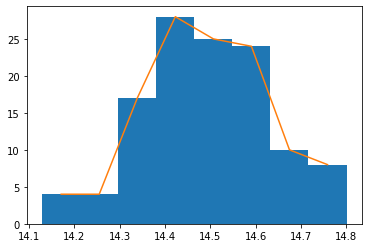

In [ ]:
freq2, edges= np.histogram(tipo1_caracteristica1,bins1)
left,right = edges[:-1],edges[1:]
X= np.array((left+right)/2)
Y= np.array(freq2)
plt.hist(tipo1_caracteristica1,bins1)
plt.plot(X,Y)
plt.show()

El desarrollo de los siguientes histogramas de frecuencia es prácticamente el mismo, lo único que cambia son las variables de los vectores independientes de cada características por cada tipo de fruta.

#<h2>Característica 1- Tipo 2</h2>

In [ ]:
da=datos[datos['tipo']==2]
tipo2_caracte1=da.iloc[0:360][['caracteristica1']] 
tipo2_caracte1.head()

,caracteristica1
120,14.74
121,14.57
122,14.36
123,14.58
124,14.68


In [ ]:
tipo2_caracte1.shape

(120, 1)

In [ ]:
tipo2_caracteristica1=np.ravel(tipo2_caracte1)
tipo2_caracteristica1.shape

(120,)

In [ ]:
rango=np.max(tipo2_caracteristica1)-np.min(tipo2_caracteristica1)
nIntervalos= 8
anchoIntervalo= (rango+0.001)/nIntervalos
bins1= np.linspace(np.min(tipo2_caracteristica1)-0.0005, np.max(tipo2_caracteristica1)+0.0005, (nIntervalos+1))
binplace= np.digitize(tipo2_caracteristica1, bins1)
freq = [len(tipo2_caracteristica1[binplace == i]) for i in range (1, len(bins1))]
print(freq)

[2, 6, 19, 13, 38, 23, 15, 4]


In [ ]:
intervals_name= []
for i in range(len(bins1)-1):
  lim_inf= bins1[i]
  lim_sup= bins1[i+1]
  label= '['+"{0:.2f}".format(lim_inf)+","+"{0:.2f}".format(lim_sup)+")"
  intervals_name.append(label)
freq_table=pd.DataFrame({'Intervalo':intervals_name, 'Frecuencia':freq}) 
freq_table

,Intervalo,Frecuencia
0,"[14.04,14.14)",2
1,"[14.14,14.24)",6
2,"[14.24,14.34)",19
3,"[14.34,14.45)",13
4,"[14.45,14.55)",38
5,"[14.55,14.65)",23
6,"[14.65,14.75)",15
7,"[14.75,14.85)",4


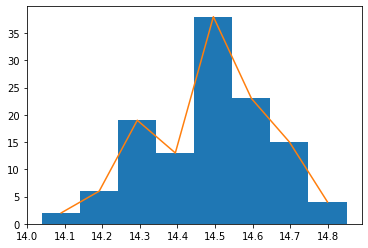

In [ ]:
freq2, edges= np.histogram(tipo2_caracteristica1,bins1)
left,right = edges[:-1],edges[1:]
X= np.array((left+right)/2)
Y= np.array(freq2)
plt.hist(tipo2_caracteristica1,bins1)
plt.plot(X,Y)
plt.show()

# <h2>Característica 1- Tipo 3</h2>

In [ ]:
da=datos[datos['tipo']==3]
tipo3_caracte1=da.iloc[0:360][['caracteristica1']] 
tipo3_caracte1.tail()

,caracteristica1
355,14.26
356,14.39
357,14.52
358,14.37
359,14.57


In [ ]:
tipo3_caracte1.shape

(120, 1)

In [ ]:
tipo3_caracteristica1=np.ravel(tipo3_caracte1)
tipo3_caracteristica1.shape

(120,)

In [ ]:
rango=np.max(tipo3_caracteristica1)-np.min(tipo3_caracteristica1)
nIntervalos= 8
anchoIntervalo= (rango+0.001)/nIntervalos
bins1= np.linspace(np.min(tipo3_caracteristica1)-0.0005, np.max(tipo3_caracteristica1)+0.0005, (nIntervalos+1))
binplace= np.digitize(tipo3_caracteristica1, bins1)
freq = [len(tipo3_caracteristica1[binplace == i]) for i in range (1, len(bins1))]
print(freq)

[9, 10, 25, 37, 18, 17, 2, 2]


In [ ]:
intervals_name= []
for i in range(len(bins1)-1):
  lim_inf= bins1[i]
  lim_sup= bins1[i+1]
  label= '['+"{0:.2f}".format(lim_inf)+","+"{0:.2f}".format(lim_sup)+")"
  intervals_name.append(label)
freq_table=pd.DataFrame({'Intervalo':intervals_name, 'Frecuencia':freq}) 
freq_table 

,Intervalo,Frecuencia
0,"[14.19,14.29)",9
1,"[14.29,14.38)",10
2,"[14.38,14.48)",25
3,"[14.48,14.58)",37
4,"[14.58,14.68)",18
5,"[14.68,14.78)",17
6,"[14.78,14.87)",2
7,"[14.87,14.97)",2


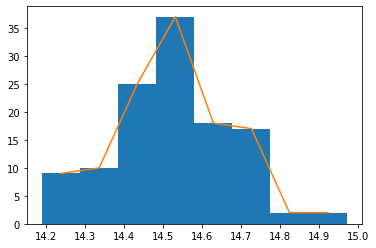

In [ ]:
freq2, edges= np.histogram(tipo3_caracteristica1,bins1)
left,right = edges[:-1],edges[1:]
X= np.array((left+right)/2)
Y= np.array(freq2)
plt.hist(tipo3_caracteristica1,bins1)
plt.plot(X,Y)
plt.show()

# <h2>Característica 2- Tipo 1</h2>

In [ ]:
da=datos[datos['tipo']==1]
tipo1_caracte2=da.iloc[0:360][['caracteristica2']] 
tipo1_caracte2.head()

,caracteristica2
0,21.82
1,21.71
2,22.04
3,22.26
4,22.02


In [ ]:
tipo1_caracte2.shape

(120, 1)

In [ ]:
tipo1_caracteristica2=np.ravel(tipo1_caracte2)
tipo1_caracteristica2.shape

(120,)

In [ ]:
rango=np.max(tipo1_caracteristica2)-np.min(tipo1_caracteristica2)
nIntervalos= 8
anchoIntervalo= (rango+0.001)/nIntervalos
bins1= np.linspace(np.min(tipo1_caracteristica2)-0.0005, np.max(tipo1_caracteristica2)+0.0005, (nIntervalos+1))
binplace= np.digitize(tipo1_caracteristica2, bins1)
freq = [len(tipo1_caracteristica2[binplace == i]) for i in range (1, len(bins1))]
print(freq)

[4, 14, 27, 35, 25, 12, 2, 1]


In [ ]:
intervals_name= []
for i in range(len(bins1)-1):
  lim_inf= bins1[i]
  lim_sup= bins1[i+1]
  label= '['+"{0:.2f}".format(lim_inf)+","+"{0:.2f}".format(lim_sup)+")"
  intervals_name.append(label)
freq_table=pd.DataFrame({'Intervalo':intervals_name, 'Frecuencia':freq}) 
freq_table 

,Intervalo,Frecuencia
0,"[21.32,21.50)",4
1,"[21.50,21.68)",14
2,"[21.68,21.87)",27
3,"[21.87,22.05)",35
4,"[22.05,22.23)",25
5,"[22.23,22.42)",12
6,"[22.42,22.60)",2
7,"[22.60,22.78)",1


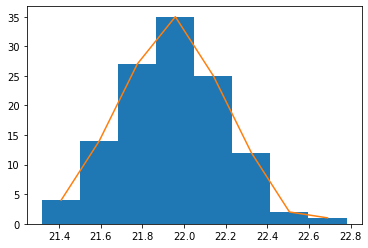

In [ ]:
freq2, edges= np.histogram(tipo1_caracteristica2,bins1)
left,right = edges[:-1],edges[1:]
X= np.array((left+right)/2)
Y= np.array(freq2)
plt.hist(tipo1_caracteristica2,bins1)
plt.plot(X,Y)
plt.show()

# <h2>Característica 2- Tipo 2</h2>

In [ ]:
da=datos[datos['tipo']==2]
tipo2_caracte2=da.iloc[0:360][['caracteristica2']] 
tipo2_caracte2.head()

,caracteristica2
120,18.20
121,18.48
122,16.78
123,16.54
124,17.58


In [ ]:
tipo2_caracte2.shape

(120, 1)

In [ ]:
tipo2_caracteristica2=np.ravel(tipo2_caracte2)
tipo2_caracteristica2.shape

(120,)

In [ ]:
rango=np.max(tipo2_caracteristica2)-np.min(tipo2_caracteristica2)
nIntervalos= 8
anchoIntervalo= (rango+0.001)/nIntervalos
bins1= np.linspace(np.min(tipo2_caracteristica2)-0.0005, np.max(tipo2_caracteristica2)+0.0005, (nIntervalos+1))
binplace= np.digitize(tipo2_caracteristica2, bins1)
freq = [len(tipo2_caracteristica2[binplace == i]) for i in range (1, len(bins1))]
print(freq)

[7, 11, 12, 25, 27, 14, 18, 6]


In [ ]:
intervals_name= []
for i in range(len(bins1)-1):
  lim_inf= bins1[i]
  lim_sup= bins1[i+1]
  label= '['+"{0:.2f}".format(lim_inf)+","+"{0:.2f}".format(lim_sup)+")"
  intervals_name.append(label)
freq_table=pd.DataFrame({'Intervalo':intervals_name, 'Frecuencia':freq}) 
freq_table 

,Intervalo,Frecuencia
0,"[15.52,16.19)",7
1,"[16.19,16.85)",11
2,"[16.85,17.52)",12
3,"[17.52,18.19)",25
4,"[18.19,18.86)",27
5,"[18.86,19.53)",14
6,"[19.53,20.19)",18
7,"[20.19,20.86)",6


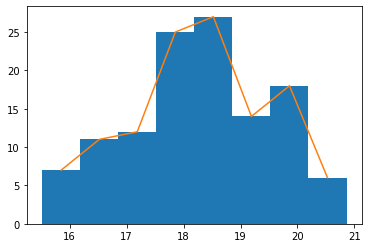

In [ ]:
freq2, edges= np.histogram(tipo2_caracteristica2,bins1)
left,right = edges[:-1],edges[1:]
X= np.array((left+right)/2)
Y= np.array(freq2)
plt.hist(tipo2_caracteristica2,bins1)
plt.plot(X,Y)
plt.show()

# <h2>Característica 2- Tipo 3</h2>

In [ ]:
da=datos[datos['tipo']==3]
tipo3_caracte2=da.iloc[0:360][['caracteristica2']] 
tipo3_caracte2.tail()

,caracteristica2
355,9.10
356,7.14
357,9.34
358,8.94
359,8.75


In [ ]:
tipo3_caracte2.shape

(120, 1)

In [ ]:
tipo3_caracteristica2=np.ravel(tipo3_caracte2)
tipo3_caracteristica2.shape

(120,)

In [ ]:
rango=np.max(tipo3_caracteristica2)-np.min(tipo3_caracteristica2)
nIntervalos= 8
anchoIntervalo= (rango+0.001)/nIntervalos
bins1= np.linspace(np.min(tipo3_caracteristica2)-0.0005, np.max(tipo3_caracteristica2)+0.0005, (nIntervalos+1))
binplace= np.digitize(tipo3_caracteristica2, bins1)
freq = [len(tipo3_caracteristica2[binplace == i]) for i in range (1, len(bins1))]
print(freq)

[4, 14, 14, 17, 31, 14, 15, 11]


In [ ]:
intervals_name= []
for i in range(len(bins1)-1):
  lim_inf= bins1[i]
  lim_sup= bins1[i+1]
  label= '['+"{0:.2f}".format(lim_inf)+","+"{0:.2f}".format(lim_sup)+")"
  intervals_name.append(label)
freq_table=pd.DataFrame({'Intervalo':intervals_name, 'Frecuencia':freq}) 
freq_table 

,Intervalo,Frecuencia
0,"[6.55,7.07)",4
1,"[7.07,7.58)",14
2,"[7.58,8.10)",14
3,"[8.10,8.62)",17
4,"[8.62,9.13)",31
5,"[9.13,9.65)",14
6,"[9.65,10.16)",15
7,"[10.16,10.68)",11


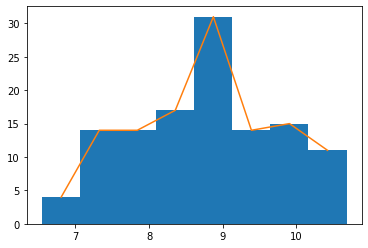

In [ ]:
freq2, edges= np.histogram(tipo3_caracteristica2,bins1)
left,right = edges[:-1],edges[1:]
X= np.array((left+right)/2)
Y= np.array(freq2)
plt.hist(tipo3_caracteristica2,bins1)
plt.plot(X,Y)
plt.show()

# <h2>Característica 3- Tipo 1</h2>

In [ ]:
da=datos[datos['tipo']==1]
tipo1_caracte3=da.iloc[0:360][['caracteristica3']] 
tipo1_caracte3.head()

,caracteristica3
0,18.15
1,18.67
2,17.85
3,17.21
4,16.81


In [ ]:
tipo1_caracte3.shape

(120, 1)

In [ ]:
tipo1_caracteristica3=np.ravel(tipo1_caracte3)
tipo1_caracteristica3.shape

(120,)

In [ ]:
rango=np.max(tipo1_caracteristica3)-np.min(tipo1_caracteristica3)
nIntervalos= 8
anchoIntervalo= (rango+0.001)/nIntervalos
bins1= np.linspace(np.min(tipo1_caracteristica3)-0.0005, np.max(tipo1_caracteristica3)+0.0005, (nIntervalos+1))
binplace= np.digitize(tipo1_caracteristica3, bins1)
freq = [len(tipo1_caracteristica3[binplace == i]) for i in range (1, len(bins1))]
print(freq)

[8, 13, 21, 19, 25, 17, 12, 5]


In [ ]:
intervals_name= []
for i in range(len(bins1)-1):
  lim_inf= bins1[i]
  lim_sup= bins1[i+1]
  label= '['+"{0:.2f}".format(lim_inf)+","+"{0:.2f}".format(lim_sup)+")"
  intervals_name.append(label)
freq_table=pd.DataFrame({'Intervalo':intervals_name, 'Frecuencia':freq}) 
freq_table 

,Intervalo,Frecuencia
0,"[15.07,15.65)",8
1,"[15.65,16.23)",13
2,"[16.23,16.81)",21
3,"[16.81,17.38)",19
4,"[17.38,17.96)",25
5,"[17.96,18.54)",17
6,"[18.54,19.12)",12
7,"[19.12,19.70)",5


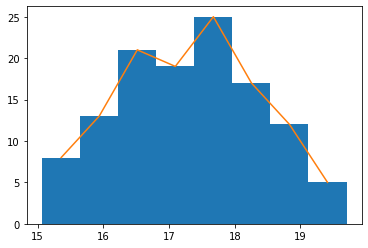

In [ ]:
freq2, edges= np.histogram(tipo1_caracteristica3,bins1)
left,right = edges[:-1],edges[1:]
X= np.array((left+right)/2)
Y= np.array(freq2)
plt.hist(tipo1_caracteristica3,bins1)
plt.plot(X,Y)
plt.show()

# <h2>Característica 3- Tipo 2</h2>

In [ ]:
da=datos[datos['tipo']==2]
tipo2_caracte3=da.iloc[0:360][['caracteristica3']] 
tipo2_caracte3.head()

,caracteristica3
120,21.38
121,17.61
122,19.32
123,18.95
124,19.14


In [ ]:
tipo2_caracte3.shape

(120, 1)

In [ ]:
tipo2_caracteristica3=np.ravel(tipo2_caracte3)
tipo2_caracteristica3.shape

(120,)

In [ ]:
rango=np.max(tipo2_caracteristica3)-np.min(tipo2_caracteristica3)
nIntervalos= 8
anchoIntervalo= (rango+0.001)/nIntervalos
bins1= np.linspace(np.min(tipo2_caracteristica3)-0.0005, np.max(tipo2_caracteristica3)+0.0005, (nIntervalos+1))
binplace= np.digitize(tipo2_caracteristica3, bins1)
freq = [len(tipo2_caracteristica3[binplace == i]) for i in range (1, len(bins1))]
print(freq)

[8, 12, 10, 27, 26, 19, 7, 11]


In [ ]:
intervals_name= []
for i in range(len(bins1)-1):
  lim_inf= bins1[i]
  lim_sup= bins1[i+1]
  label= '['+"{0:.2f}".format(lim_inf)+","+"{0:.2f}".format(lim_sup)+")"
  intervals_name.append(label)
freq_table=pd.DataFrame({'Intervalo':intervals_name, 'Frecuencia':freq}) 
freq_table 

,Intervalo,Frecuencia
0,"[15.98,16.73)",8
1,"[16.73,17.48)",12
2,"[17.48,18.23)",10
3,"[18.23,18.97)",27
4,"[18.97,19.72)",26
5,"[19.72,20.47)",19
6,"[20.47,21.22)",7
7,"[21.22,21.97)",11


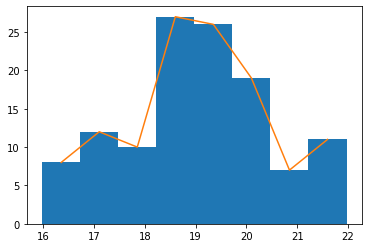

In [ ]:
freq2, edges= np.histogram(tipo2_caracteristica3,bins1)
left,right = edges[:-1],edges[1:]
X= np.array((left+right)/2)
Y= np.array(freq2)
plt.hist(tipo2_caracteristica3,bins1)
plt.plot(X,Y)
plt.show()

# <h2>Característica 3- Tipo 3</h2>

In [ ]:
da=datos[datos['tipo']==3]
tipo3_caracte3=da.iloc[0:360][['caracteristica3']] 
tipo3_caracte3.tail()

,caracteristica3
355,9.85
356,8.38
357,6.07
358,6.03
359,8.17


In [ ]:
tipo3_caracte3.shape

(120, 1)

In [ ]:
tipo3_caracteristica3=np.ravel(tipo3_caracte3)
tipo3_caracteristica3.shape

(120,)

In [ ]:
rango=np.max(tipo3_caracteristica3)-np.min(tipo3_caracteristica3)
nIntervalos= 8
anchoIntervalo= (rango+0.001)/nIntervalos
bins1= np.linspace(np.min(tipo3_caracteristica3)-0.0005, np.max(tipo3_caracteristica3)+0.0005, (nIntervalos+1))
binplace= np.digitize(tipo3_caracteristica3, bins1)
freq = [len(tipo3_caracteristica3[binplace == i]) for i in range (1, len(bins1))]
print(freq)

[1, 4, 11, 21, 25, 32, 20, 6]


In [ ]:
intervals_name= []
for i in range(len(bins1)-1):
  lim_inf= bins1[i]
  lim_sup= bins1[i+1]
  label= '['+"{0:.2f}".format(lim_inf)+","+"{0:.2f}".format(lim_sup)+")"
  intervals_name.append(label)
freq_table=pd.DataFrame({'Intervalo':intervals_name, 'Frecuencia':freq}) 
freq_table 

,Intervalo,Frecuencia
0,"[4.96,5.81)",1
1,"[5.81,6.67)",4
2,"[6.67,7.52)",11
3,"[7.52,8.38)",21
4,"[8.38,9.23)",25
5,"[9.23,10.08)",32
6,"[10.08,10.94)",20
7,"[10.94,11.79)",6


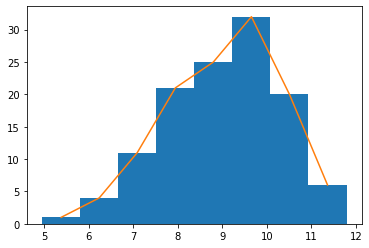

In [ ]:
freq2, edges= np.histogram(tipo3_caracteristica3,bins1)
left,right = edges[:-1],edges[1:]
X= np.array((left+right)/2)
Y= np.array(freq2)
plt.hist(tipo3_caracteristica3,bins1)
plt.plot(X,Y)
plt.show()

# **Histogramas por características**


> Realice un gráfico que muestre el comportamiento de cada característica usando histogramas para cada fruto.



#<h2>Característica 1</h2>

A fin de un óptimo manejo de los datos, se verifica nuevamente que estos preserven el orden correcto del archivo fuente. 


In [ ]:
datos['caracteristica1']

0      14.40
1      14.43
2      14.58
3      14.73
4      14.46
       ...  
355    14.26
356    14.39
357    14.52
358    14.37
359    14.57
Name: caracteristica1, Length: 360, dtype: float64

Para graficar los histogramas de este punto se implementa el mismo código que en el pasado, con la diferencia que en este caso no hay que delimitar los elementos de la tabla por su tipo de fruta. Simplemente para obtener los datos necesarios, se accede a la columna de características requerida para cada caso.

In [ ]:
rango=np.max(datos['caracteristica1'])-np.min(datos['caracteristica1'])
nIntervalos= 8
anchoIntervalo= (rango+0.001)/nIntervalos
bins1= np.linspace(np.min(datos['caracteristica1'])-0.0005, np.max(datos['caracteristica1'])+0.0005, (nIntervalos+1))
binplace= np.digitize(datos['caracteristica1'], bins1)
freq = [len(datos['caracteristica1'][binplace == i]) for i in range (1, len(bins1))]
print(freq)

[4, 21, 50, 96, 119, 51, 17, 2]


[14.0976875 14.2140625 14.3304375 14.4468125 14.5631875 14.6795625
 14.7959375 14.9123125]
[  4  21  50  96 119  51  17   2]


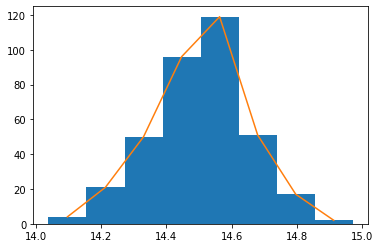

In [ ]:
freq2, edges= np.histogram(datos['caracteristica1'],bins1)
left,right = edges[:-1],edges[1:]
X= np.array((left+right)/2)
Y= np.array(freq2)
print(X)
print(Y)
plt.hist(datos['caracteristica1'],bins1)
plt.plot(X,Y)
plt.show()

#<h2>Característica 2</h2>

In [ ]:
datos['caracteristica2']

0      21.82
1      21.71
2      22.04
3      22.26
4      22.02
       ...  
355     9.10
356     7.14
357     9.34
358     8.94
359     8.75
Name: caracteristica2, Length: 360, dtype: float64

In [ ]:
rango=np.max(datos['caracteristica2'])-np.min(datos['caracteristica2'])
nIntervalos= 8
anchoIntervalo= (rango+0.001)/nIntervalos
bins1= np.linspace(np.min(datos['caracteristica2'])-0.0005, np.max(datos['caracteristica2'])+0.0005, (nIntervalos+1))
binplace= np.digitize(datos['caracteristica2'], bins1)
freq = [len(datos['caracteristica2'][binplace == i]) for i in range (1, len(bins1))]
print(freq)

[48, 70, 2, 0, 13, 66, 40, 121]


[ 7.5639375  9.5928125 11.6216875 13.6505625 15.6794375 17.7083125
 19.7371875 21.7660625]
[ 48  70   2   0  13  66  40 121]


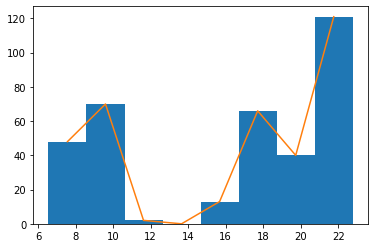

In [ ]:
freq2, edges= np.histogram(datos['caracteristica2'],bins1)
left,right = edges[:-1],edges[1:]
X= np.array((left+right)/2)
Y= np.array(freq2)
print(X)
print(Y)
plt.hist(datos['caracteristica2'],bins1)
plt.plot(X,Y)
plt.show()

#<h2>Característica 3</h2>

In [ ]:
datos['caracteristica3']

0      18.15
1      18.67
2      17.85
3      17.21
4      16.81
       ...  
355     9.85
356     8.38
357     6.07
358     6.03
359     8.17
Name: caracteristica3, Length: 360, dtype: float64

In [ ]:
rango=np.max(datos['caracteristica3'])-np.min(datos['caracteristica3'])
nIntervalos= 8
anchoIntervalo= (rango+0.001)/nIntervalos
bins1= np.linspace(np.min(datos['caracteristica3'])-0.0005, np.max(datos['caracteristica3'])+0.0005, (nIntervalos+1))
binplace= np.digitize(datos['caracteristica3'], bins1)
freq = [len(datos['caracteristica3'][binplace == i]) for i in range (1, len(bins1))]
print(freq)

[8, 54, 57, 1, 6, 96, 103, 35]


[ 6.0226875  8.1490625 10.2754375 12.4018125 14.5281875 16.6545625
 18.7809375 20.9073125]
[  8  54  57   1   6  96 103  35]


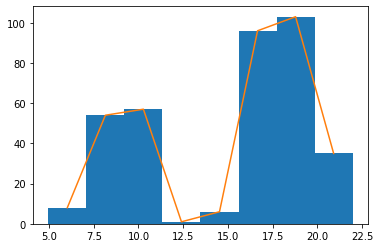

In [ ]:
freq2, edges= np.histogram(datos['caracteristica3'],bins1)
left,right = edges[:-1],edges[1:]
X= np.array((left+right)/2)
Y= np.array(freq2)
print(X)
print(Y)
plt.hist(datos['caracteristica3'],bins1)
plt.plot(X,Y)
plt.show()

# **Diagramas de cajas**


>  Realice un gráfico que muestre el comportamiento de cada característica usando diagramas de cajas para cada fruto.



La función *boxplot* de la librería matplotlib, permite desarrollar diagramas de cajas de forma sencilla. Para este caso, únicamente solicita como valores de entrada la relación entre una misma característica, por los tres tipos de fruta.

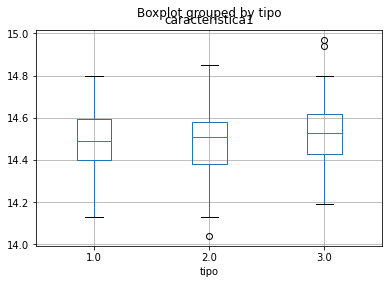

In [ ]:
datos.boxplot(column='caracteristica1', by='tipo')

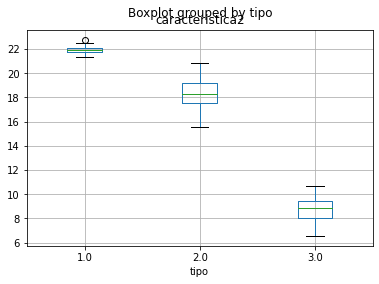

In [ ]:
datos.boxplot(column='caracteristica2', by='tipo')

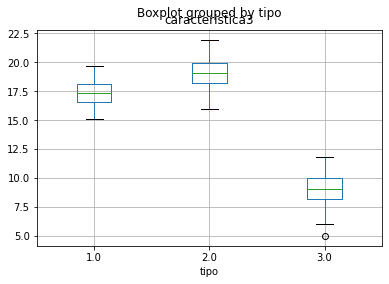

In [ ]:
datos.boxplot(column='caracteristica3', by='tipo')

En los diagramas de cajas, aplica:

1. La línea verde es la mediana.
2. la línea superior de la caja es el tercer cuartil.
3. La línea inferior de la caja es el primer cuartil.
4. La línea superior indica la distancia de 1.5 rangos intercuartílicos del tercer cuartil (máximo valor).
5. La línea inferior indica la distancia de 1.5 rangos intercuartílicos del primer cuartil (mínimo valor).
6. Los círculos en la parte inferior o superior, son datos atípicos (muy pequeños o muy grandes).
7. Cuando la parte inferior de la caja comparada con la superior (tomando como referencia la mediana) es mas grande, indica que el sesgo es negativo, de lo contrario el sesgo es positivo. 

# **La fruta más probable**


> Describa el procedimiento que alguien debería seguir a partir del conocimiento del valor de las características de una fruta para determinar el tipo de fruta más probable. Argumente su respuesta utilizando las medidas de tendencia central y dispersión que considere apropiadas para las diferentes características, apoyándose también en los gráficos previamente desarrollados.



Se implementa por cada tipo de fruta la función *.describe()*, la cual brinda los resultados de algunas de las medidas de tendencia central y dispersión más usadas.

In [ ]:
datos[datos['tipo']==1].describe()

,tipo,caracteristica1,caracteristica2,caracteristica3
count,120.0,120.000000,120.000000,120.000000
mean,1.0,14.494667,21.943083,17.316250
std,0.0,0.139591,0.253181,1.047858
min,1.0,14.130000,21.320000,15.070000
25%,1.0,14.397500,21.787500,16.537500
50%,1.0,14.490000,21.950000,17.330000
75%,1.0,14.592500,22.122500,18.142500
max,1.0,14.800000,22.780000,19.700000


In [ ]:
datos[datos['tipo']==2].describe()

,tipo,caracteristica1,caracteristica2,caracteristica3
count,120.0,120.000000,120.000000,120.000000
mean,2.0,14.487583,18.280167,19.041583
std,0.0,0.158793,1.230549,1.425604
min,2.0,14.040000,15.520000,15.980000
25%,2.0,14.380000,17.547500,18.255000
50%,2.0,14.510000,18.300000,19.055000
75%,2.0,14.580000,19.210000,19.940000
max,2.0,14.850000,20.860000,21.970000


In [ ]:
datos[datos['tipo']==3].describe()

,tipo,caracteristica1,caracteristica2,caracteristica3
count,120.0,120.00000,120.000000,120.000000
mean,3.0,14.52625,8.775083,9.025167
std,0.0,0.14611,0.980513,1.273935
min,3.0,14.19000,6.550000,4.960000
25%,3.0,14.43000,8.050000,8.197500
50%,3.0,14.53000,8.830000,9.055000
75%,3.0,14.62000,9.415000,9.995000
max,3.0,14.97000,10.680000,11.790000


Por medio de estos valores se llega a los promedios de la desviación estándar y media de cada tipo de fruta, y con ayuda de los histogramas es fácil identificar el comportamiento de una distribución normal. De esta manera se logra determinar el tipo de fruta más probable.